# Principal Component Analysis in Python

## Part 0 - The Maths

First we will go over implementing the *mathematical* theory of PCA in Python. There are packages that will make this part much easier for us in everyday use - they will be demonstrated later.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

iris = pd.read_csv("../input/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Standardise our data, so that each field has a mean of 0 and a standard deviation of 1.

In [2]:
numeric_fields = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

iris_standardised = np.array(
    (iris[numeric_fields] - iris[numeric_fields].mean()) / iris[numeric_fields].std()
)
iris_standardised

array([[-8.97673879e-01,  1.02861128e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00, -1.24540379e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.38072709e+00,  3.36720285e-01, -1.39346985e+00,
        -1.30859282e+00],
       [-1.50149039e+00,  1.06089953e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.01843718e+00,  1.25924161e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-5.35383973e-01,  1.95113261e+00, -1.16676652e+00,
        -1.04652483e+00],
       [-1.50149039e+00,  7.97980949e-01, -1.33679402e+00,
        -1.17755883e+00],
       [-1.01843718e+00,  7.97980949e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.74301699e+00, -3.55170711e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00,  1.06089953e-01, -1.28011819e+00,
        -1.43962681e+00],
       [-5.35383973e-01,  1.48987194e+00, -1.28011819e+00,
        -1.30859282e+00],
       [-1.25996379e+00,  7.97980949e-01, -1.22344235e+00,
      

Get the covariance matrix of the standardised dataset.

Note: by default, `np.cov()` treats an array as having each COLUMN being a record, and each ROW being a field. We can switch this around by adding the argument `rowvar=False`.

In [3]:
iris_covariance_matrix = np.cov(iris_standardised, rowvar=False)
iris_covariance_matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

Get the eigenvalues and eigenvectors of the covariance matrix.

Note: `np.linalg.eig()` returns eigenvalues in descending order, so we do not need to re-sort the eigenvectors.

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(iris_covariance_matrix)
print(sum(eigenvalues[0:2] / sum(eigenvalues)))

0.9580097536148198


We can see above that the first two principal components explain 95.8% of the variance in the data.

Because two dimensions can explain over 95% of the variance, why don't we transform our data into two dimensions and see what happens?

Note: the `@` operation in Python is matrix multiplication.

In [5]:
iris_transformed = pd.DataFrame(iris_standardised @ eigenvectors).rename(
    columns={i: f"PC{i+1}" for i, _ in enumerate(numeric_fields)}
)
iris_transformed["Species"] = iris["Species"]
iris_transformed

,PC1,PC2,PC3,PC4,Species
0,-2.256981,-0.504015,-0.121536,0.022996,Iris-setosa
1,-2.079459,0.653216,-0.226492,0.102864,Iris-setosa
2,-2.360044,0.317414,0.051308,0.027732,Iris-setosa
3,-2.296504,0.573447,0.098530,-0.066090,Iris-setosa
4,-2.380802,-0.672514,0.021356,-0.037272,Iris-setosa
...,...,...,...,...,...
145,1.864277,-0.381544,0.253682,0.387592,Iris-virginica
146,1.553288,0.902291,-0.025297,0.220583,Iris-virginica
147,1.515767,-0.265904,0.178679,0.118506,Iris-virginica
148,1.371796,-1.012968,0.928295,0.024066,Iris-virginica


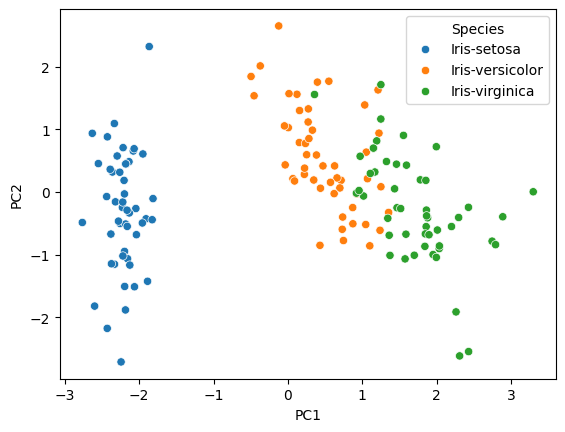

In [6]:
sns.scatterplot(data=iris_transformed, x="PC1", y="PC2", hue="Species")
plt.show()

## Part 1 - Actual Python

There is no need to do the steps for PCA as above - functions for data standardisation and PCA exist in the `scikit-learn` package. 

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Standardise the dataset. 

Note: `sc.fit_transform()` will create a model called `sc` for scaling data *and* scale the data that are passed to it. If we receive unseen data later and want to transform these unseen data into the same co-ordinates as our PCA model, we can scale it with the function `sc.transform(unseen_data)`.

In [8]:
sc = StandardScaler()
iris_standardised = sc.fit_transform(iris[numeric_fields])
iris_standardised

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

`PCA(n_components=4)` will instantiate a model ready to transform data into 4 dimensions (4 principal components). As long as this number is less than or equal to the dimensionlity of our untransformed dataset and greater than or equal to the number of dimensions we want to transform our data into, it does not matter what number we use here (though it must be an integer).

We *fit* the model using `pca.fit(iris_standardised)`, and *transform* the data using `pca.transform(iris_standardised)`.

In [9]:
pca = PCA(n_components=4)
pca.fit(iris_standardised)
iris_transformed = pd.DataFrame(pca.transform(iris_standardised)).rename(
    columns={i: f"PC{i+1}" for i, _ in enumerate(numeric_fields)}
)
iris_transformed["Species"] = iris["Species"]
iris_transformed

,PC1,PC2,PC3,PC4,Species
0,-2.264542,0.505704,0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,-0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,-0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,-0.021428,0.037397,Iris-setosa
...,...,...,...,...,...
145,1.870522,0.382822,-0.254532,-0.388890,Iris-virginica
146,1.558492,-0.905314,0.025382,-0.221322,Iris-virginica
147,1.520845,0.266795,-0.179277,-0.118903,Iris-virginica
148,1.376391,1.016362,-0.931405,-0.024146,Iris-virginica


We can check how much variance is explained by the first 2 principal components - again, it is 95.8%.

In [10]:
print(sum(pca.explained_variance_[0:2]) / sum(pca.explained_variance_))

0.9580097536148198


Plot the data in 2D.

Note: the plot below has been *flipped* along the $y$-axis. This is because principal components are unique down to direction - the negative of a principal component is equivalent to its positive.

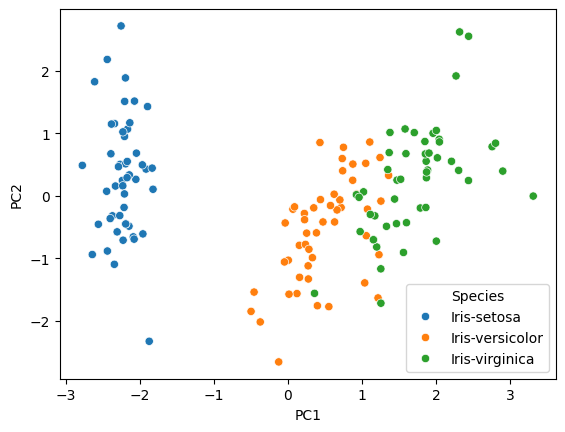

In [11]:
sns.scatterplot(data=iris_transformed, x="PC1", y="PC2", hue="Species")
plt.show()